### 1.	What is Boosting?

Boosting is an ensemble approach(meaning it involves several trees) that starts from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision-makers.
The weights are assigned based on the performance of an individual tree.

Ensemble parameters are calculated in **stagewise way** which means that while calculating the subsequent weight, the learning from the previous tree is considered as well.


### 2.	How do boosting and bagging differ?

**Bagging** is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we get an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree classifier.

**Boosting** is used to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analysing data for errors. Consecutive trees (random sample) are fit and at every step, the goal is to improve the accuracy from the prior tree. When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. This process converts weak learners into better performing model.

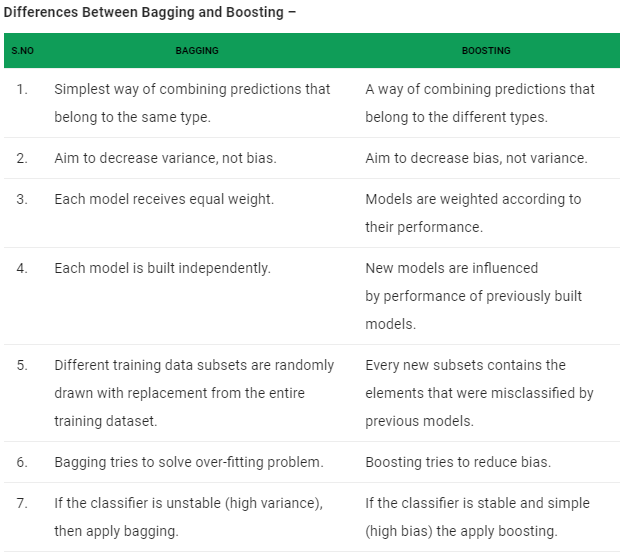

### 3.	What are week and strong classifiers?

A weak learner is defined to be a classifier that is only slightly correlated with the true classification.

In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

### 4.	Why are trees deemed fit for boosting?

Decision tree is simple but better than random guessing, not too many parameter tuning for each weak tree, which saves a lot work and moreover decision tree is non-linear.

- Decision trees are able to generate understandable rules.
- Decision trees perform classification without requiring much computation.
- Decision trees are able to handle both continuous and categorical variables.

### 5.	Explain the step by step implementation of ADA Boost.

#### AdaBoost: (Adaptive Boosting)
The weak learners in AdaBoost are decision trees with a single split, called decision stumps for their shortness.

Weak models are added sequentially, trained using the weighted training data.

The process continues until a pre-set number of weak learners have been created (a user parameter) or no further improvement can be made on the training dataset.

Once completed, you are left with a pool of weak learners each with a stage value.

AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns.

The steps to implement the Ada Boost algorithm using the decision trees are as follows:

**Algorithm**:

Assume that the number of training samples is denoted by $N$, and the number of iterations (created trees) is $M$. Notice that possible class outputs are $Y=\{-1,1\}$

1. Initialize the observation weights  $w_i=\frac{1}{N}$ where $i = 1,2, \dots, N$ for all the samples.
2. For $m=1$ to $M$:
    - fit a classifier $G_m(x)$ to the training data using weights $w_i$,
    - compute $err_m = \frac{\sum_{i=1}^{N} w_i I (y_i \neq G_m(x))}{\sum_{i=1}^{N}w_i}$,
    - compute $\alpha_m = \frac {1}{2} \log (\frac{(1-err_m)}{err_m})$. This is the contribution of that tree to the final result.
    - calculate the new weights using the formula:
    
    $w_i \leftarrow w_i \cdot \exp [\alpha_m \cdot I (y_i \neq G_m(x)]$, where $i = 1,2, \dots, N$
- Normalize the new sample  weights so that their sum is 1.
- Construct the next tree using the new weights


 3. At the end, compare the summation of results from all the trees and the final result is either the one with the highest sum(for regression) or it is the class which has the most weighted voted average(for classification).

       Output $G_m(x) = argmax [\sum_{m=1}^{M} \alpha_m G_m(x)]$ (Regression)

       Output $G_m(x) = sigm [\sum_{m=1}^{M} \alpha_m G_m(x)]$ (Classification)

### 6.	What are pseudo residuals?

Pseudo residual= actual label - the predicted result (which is average in the first iteration)

### 7.	Explain the step by step implementation of Gradient Boosted Trees.

**Gradient Boosted Trees** use decision trees as estimators. It can work with different loss functions (regression, classification, risk modelling etc.), evaluate it's gradient and approximates it with a simple tree (stage-wisely, that minimizes the overall error).

AdaBoost is a special case of Gradient Boosted Tree that uses exponential loss function.

**The Algorithm:**

- Calculate the average of the label column as initially this average shall minimise the total error.
- Calculate the pseudo residuals.
       Pseudo residual= actual label- the predicted result (which is average in the first iteration)
  Mathematically,
  
     derivative of the pseudo residual=$(\frac {\delta L(y_i,f(x_i))}{\delta (f(x_i))})$
     
     where, L is the loss function.
                          
               
     Here, the gradient of the error term is getting calculated as the goal is to minimize the error. Hence the name gradient boosted trees
- create a tree to predict the pseudo residuals instead  of a tree to predict for the actual column values.
- new result= previous result+learning rate* residual 
   
   Mathematically, 
     $ F_1(x)= F_0(x)+ \nu \sum \gamma $
     
 where  $ \nu $ is the learning rate and $ \gamma $ is the residual

Repeat these steps until the residual stops decreasing

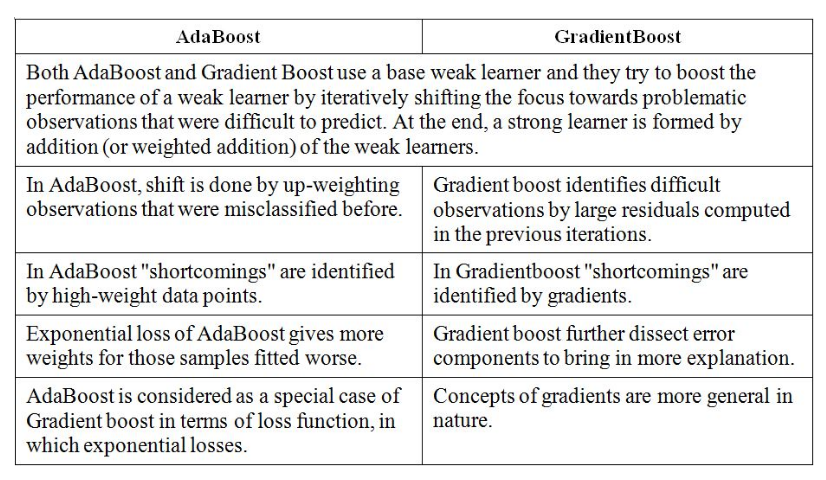

### 8.	Explain the step by step implementation of XGBoost Algorithm.

XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ($j$ trees). In the formula $f_j$ means a prediction coming from the $j^th$ tree.

$$
obj(\theta) = \sum_{i}^{n} l(y_i - \hat{y_i}) +  \sum_{j=1}^{j} \Omega (f_j)
$$

Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2
$$

First part ($\gamma T$) is responsible for controlling the overall number of created leaves, and the second term ($\frac{1}{2} \lambda \sum_{j=1}^{T}w_j^2$) watches over the scores.

**Mathematics Involved**
Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the *number of residuals* and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:

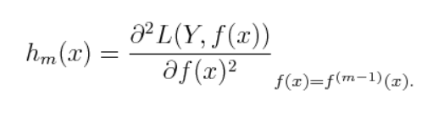

where **L** is the loss function. 

- Initialise the tree with only one leaf.
- compute the similarity using the formula
$$
Similarity= \frac {Gradient^2}{ hessian +\lambda}
$$
Where $\lambda $ is the regularisation term.
- Now for splitting data into a tree form, calculate
$$
Gain=  left similarity+right similarity-similarity for root
$$ 
- For tree pruning, the parameter $ \gamma$ is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of $\gamma$.


 If $Gain- \gamma < 0$, remove that branch. Else, keep the branch 
 
- Learning is done using the equation
$$
New Value= old Value+ \eta * prediction
$$

where $\eta$ is the learning rate

### 9.	What are the advantages of XGBoost?

**The main advantages:**
- out of the box feature of appropriate bias-variance trade-off,
- great computation speed as it utilises parallel computing and cache optimization,
- uses hardware optimization,
- works well even if the features are correlated
- robust even if there is noise for classification problem
- the facility of early stopping
- the package is evolving, i.e., new features are being added.

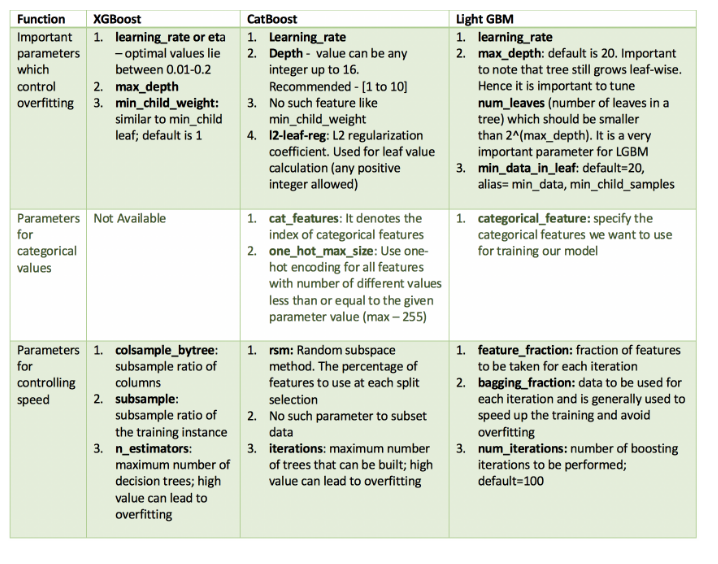